In [1]:
import streamlit as st
from datetime import date
import yfinance as yf
from prophet import Prophet
from prophet.plot import plot_plotly
from plotly import graph_objs as go


In [2]:
Start_date = "2016-01-01"
today= date.today().strftime("%Y-%m-%d")
today

'2023-10-24'

In [3]:
st.title('Stock App')

2023-10-24 21:31:09.167 
  command:

    streamlit run C:\Users\ammad\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

In [4]:
# Define a mapping of company names to their ticker symbols
company_to_symbol = {
    'Google': 'GOOG',
    'Apple': 'AAPL',
    'Microsoft': 'MSFT',
    'GameStop': 'GME'
}

# Let the user select a company
selected_company = st.selectbox('Select company for prediction', list(company_to_symbol.keys()))

# Get the ticker symbol for the selected company
selected_stock = company_to_symbol[selected_company]


In [17]:
n_years = st.slider('Years of prediction:', 1, 4)
period = n_years * 365

2023-10-24 21:50:15.065 Session state does not function when running a script without `streamlit run`


In [8]:

def load_data(ticker):
    data =yf.download(ticker,Start_date,today)
    data.reset_index(inplace=True)
    return data
data=load_data(selected_stock)

[*********************100%%**********************]  1 of 1 completed


In [10]:
# Display the raw data
st.subheader('Raw data')
st.write(data.tail())
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1959,2023-10-16,139.729996,140.904999,139.320007,140.490005,140.490005,17345600
1960,2023-10-17,140.029999,141.250000,138.529007,140.990005,140.990005,17424000
1961,2023-10-18,140.750000,141.990005,138.705002,139.279999,139.279999,18304900
1962,2023-10-19,139.800003,141.005005,138.600006,138.979996,138.979996,21831200
1963,2023-10-20,138.589996,139.039993,136.244995,136.740005,136.740005,24953900


In [11]:
def plot_raw_data():
    fig=go.Figure()
    fig.add_trace(go.Scatter(x=data['Date'],y=data['Open'],name="Stock_open"))
    fig.add_trace(go.Scatter(x=data['Date'],y=data['Close'],name="Stock_close"))
    fig.layout.update(title_text="Time Series Data",xaxis_rangeslider_visible=True)
    st.plotly_chart(fig)

plot_raw_data()    
        

In [20]:
df_train =data[['Date','Close']]
df_train =df_train.rename(columns={"Date":"ds","Close":"y"})

In [15]:
m =Prophet()
m.fit(df_train)

21:48:04 - cmdstanpy - INFO - Chain [1] start processing
21:48:05 - cmdstanpy - INFO - Chain [1] done processing


In [18]:
future=m.make_future_dataframe(periods=period)

In [19]:
forecast = m.predict(future)

In [21]:
st.subheader('Forecast data')
st.write(forecast.tail())


In [23]:
def plot_forecast_data():
    st.write(f'Forecast plot for {n_years} years')
    fig1 = plot_plotly(m,forecast)
    st.plotly_chart(fig1)

plot_forecast_data()    

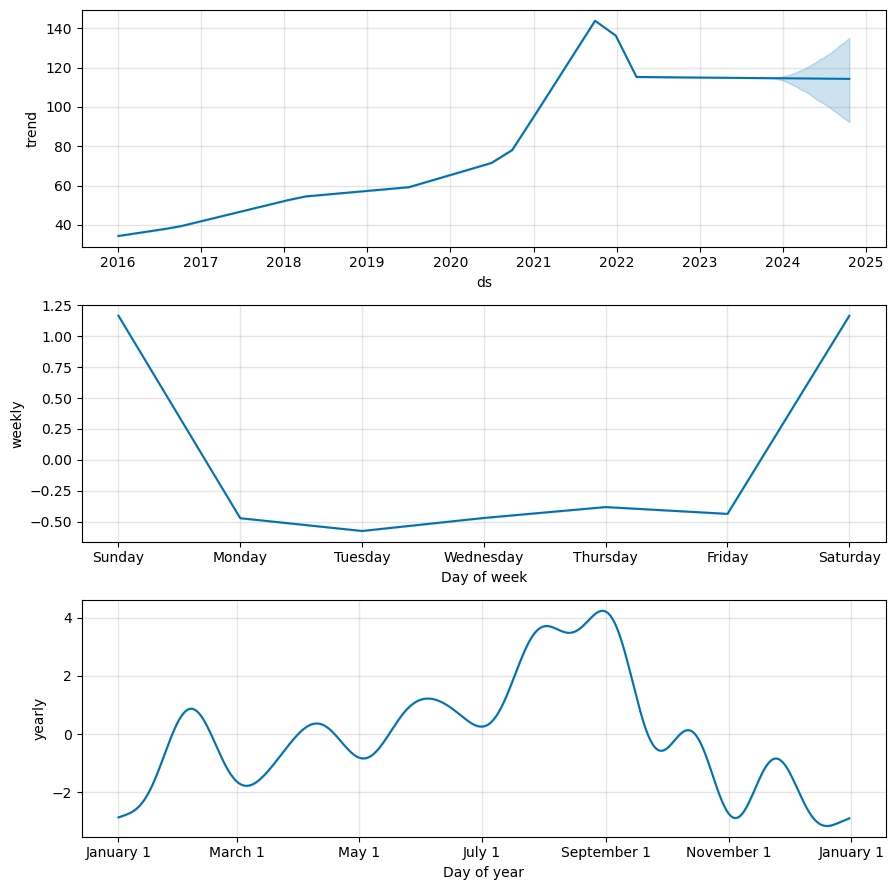

In [25]:
st.write("Forecast components")
fig2 = m.plot_components(forecast)
st.write(fig2)

In [27]:
# Define the date range as strings with the same format
min_date = data['Date'].min().strftime('%Y-%m-%d')
max_date = data['Date'].max().strftime('%Y-%m-%d')
today_date = date.today().strftime('%Y-%m-%d')

# Date range selector for custom data exploration
start_date = st.date_input("Start Date", min_value=min_date, max_value=max_date, value=min_date)
end_date = st.date_input("End Date", min_value=min_date, max_value=max_date, value=max_date)


StreamlitAPIException: DateInput value should either be an date/datetime or a list/tuple of 0 - 2 date/datetime values